In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# get image path
image_path = "../Data_Group_Component_Task_1/Test/original_retinal_images/"
ma_path = "../Data_Group_Component_Task_1/Test/masks_Microaneurysms/"

images = os.listdir(image_path)
ma = os.listdir(ma_path)
images.sort()
ma.sort()
img_number = 0
img_name = image_path + images[img_number]
ma_name = ma_path + ma[img_number]

# read the image
img = cv2.imread(img_name)

# set to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# resize to 576*720
img_resize = cv2.resize(img_gray, (576,720), interpolation=cv2.INTER_CUBIC)

# applying adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
img_clahe = clahe.apply(img_resize)

# edge detection (Canny method)
img_canny = cv2.Canny(img_clahe, 40, 150)

# GaussianBlur
img_gb = cv2.GaussianBlur(img_canny,(3,3),0)

# disc-shaped structuring element (SE) of radius 6
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
# morphological opening operation (erosion then dilation)
img_opening = cv2.morphologyEx(img_gb, cv2.MORPH_OPEN, kernel)

# subtracted from the image of microaneurysms and artifacts
img_final = cv2.subtract(img_opening, img_clahe)

# resize to original size
img_final_final = cv2.resize(img_final, (4288,2848), interpolation=cv2.INTER_CUBIC)

# read the answer
img_ma_answer = cv2.imread(ma_name)
# set to gray
img_magray = cv2.cvtColor(img_ma_answer, cv2.COLOR_BGR2GRAY)
img_magray = cv2.resize(img_magray, (576,720), interpolation=cv2.INTER_CUBIC)
img_magray_magray = cv2.resize(img_magray, (4288,2848), interpolation=cv2.INTER_CUBIC)


def evaluation(image, mask):
    
    zeros_list_img, one_list_img, zeros_list_mk, one_list_mk = [], [], [], []
    
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            val_mk = mask[i][j]
            val_img  = image[i][j]
            if val_mk == 0:
                zeros_list_mk.append((i,j))
            else:
                one_list_mk.append((i,j))
            if val_img == 0:
                zeros_list_img.append((i,j))
            else:
                one_list_img.append((i,j))
    #print(len(one_list_img))
    TP = len(set(one_list_img).intersection(set(one_list_mk)))
    TN = len(set(zeros_list_img).intersection(set(zeros_list_mk)))
    FP = len(set(one_list_img).intersection(set(zeros_list_mk)))
    FN = len(set(zeros_list_img).intersection(set(one_list_mk)))
    TPR = TP/(FN + TP)
    TNR = TN/(TN + FP)
    P = TP/(TP + FP)
    R = TP/(TP + FN)
    F = 2*(R*P/(R + P))
    JSC = TP/(TP + FP + FN)
    DSC = 2*(TP/(FP + 2*TP + FN))
    return TPR, TNR, F, JSC, DSC

result:


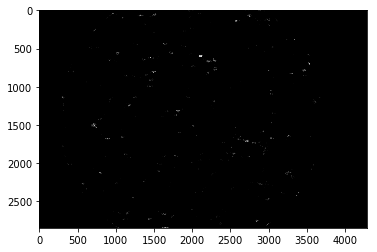

masks_Microaneurysms:


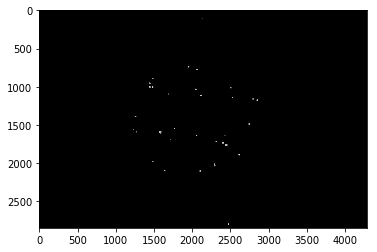

------------------------
JSC = 0.010615177252823082


In [3]:
print('result:')
plt.imshow(img_final_final,'gray')
plt.show()

print('masks_Microaneurysms:')
plt.imshow(img_magray_magray,'gray')
plt.show()

print('------------------------')
TPR, TNR, F, JSC, DSC = evaluation(img_final_final, img_magray_magray)
print('JSC = ', end = '')
print(JSC)